# Laboratorio 1  
## Mineria de Datos - Seccion 20  
### Grupo 3: Andrés de la Roca y Jun Woo Lee

In [638]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta
from datetime import datetime

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [639]:
baseballdata = pd.read_csv('baseball_reference_2016_scrape.csv')

## Limpieza de las variables

(Ademas de algunos reemplazos de valores faltantes)

In [640]:
#Limpiando la variable attendance
baseballdata['attendance'] = baseballdata["attendance"].str.split('\'').str[0]
attendanceArray = []
for item in baseballdata['attendance']:
    try:
        attendanceArray.append(int(item.replace(',', '')))
    except:
        attendanceArray.append(None) #En caso de encontrar valores erroneos
baseballdata['attendance'] = attendanceArray


#Limpiando la variable game_duration
baseballdata['game_duration'] = baseballdata['game_duration'].str.split(': ').str[1]
game_durationArray = []
for item in baseballdata['game_duration']:
    try:
        hours = item.split(":")[0]
        minutes = item.split(":")[1]
        hours = int(hours)
        minutes = int(minutes)
        delta = timedelta(hours=hours, minutes=minutes)
        total_seconds = delta.total_seconds()
        minutes = int(total_seconds // 60)
        game_durationArray.append(minutes)
    except:
        game_durationArray.append(None)

baseballdata['game_duration'] = game_durationArray

#Limpiando la variable date para solo guardar dia de la semana
baseballdata['date'] = baseballdata['date'].str.split(',').str[0]

#Limpiando la variable start_time (Hora de inicio)
baseballdata['start_time'] = baseballdata['start_time'].str.split('e: ').str[1]
baseballdata['start_time'] = baseballdata['start_time'].str.replace(".", "")
baseballdata['start_time'] = baseballdata['start_time'].str.split(' L').str[0]

start_timeArray = []
for item in baseballdata['start_time']:
    formato = '%I:%M %p'
    item = datetime.strptime(item, formato).time()
    start_timeArray.append(item)
baseballdata['start_time'] = start_timeArray
baseballdata = clean(baseballdata, columns='start_time', method='fillmissing') #FIX ME

#Limpiando la variable venue (Estado o lugar del partido)
baseballdata['venue'] = baseballdata['venue'].str.split(': ').str[1] #FIX ME


#Limpieza de las demas variables para que tengan un tipo estandarizado
columns2Delete = ['other_info_string', 'field_type', 'boxscore_url', 'away_team_errors', 
'home_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_hits', 'home_team_runs']
baseballdata = clean(baseballdata, method='dropcols', columns = columns2Delete)
to_int = ['attendance', 'game_duration']
baseballdata = clean(baseballdata, method='dtypes', columns=to_int, dtype='int32')
to_categoric = ["away_team", "home_team", "game_type", "venue", 'date']
baseballdata = clean(baseballdata, method='dtypes', columns=to_categoric, dtype='category')

C:\Users\Andre\AppData\Local\Temp\ipykernel_17512\2343021004.py:35: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\clean_data.py:101: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



#### Estandarizar los nombres de las columnas:

In [641]:
baseballdata = clean(baseballdata, method = "standardize")

#### Reemplazar valores faltantes

In [642]:
baseballdata = clean(baseballdata, columns="game_type", method="fillmissing")
baseballdata = clean(baseballdata, columns="attendance", method="fillmissing") #Reemplazo de valores None (Faltantes)
baseballdata = baseballdata.astype({'attendance':'int'})
baseballdata = clean(baseballdata, columns="game_duration", method="fillmissing") #Reemplazo de valores None (Faltantes)
baseballdata = baseballdata.astype({'game_duration':'int'})
baseballdata = clean(baseballdata, columns='start_time', method='fillmissing')


## Resumen de la data (pandas_profiling)

In [643]:
# profile = ProfileReport(baseballdata)
# profile

## Resumen de la data (QuickDA!)

In [644]:
explore(baseballdata, method="summarize")

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:26: FutureWarning:

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:28:

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
attendance,int32,2463,0,0.0,2374,8766,22427.0,30601.0,38401.5,54449,30370.077954,30601.0,9876.915399,-0.05174
away_team,category,2463,0,0.0,30,-,-,-,-,-,-,-,-,-
date,category,2463,0,0.0,7,-,-,-,-,-,-,-,-,-
game_duration,int32,2463,0,0.0,168,75,167.0,182.0,198.5,373,185.100284,182.0,27.630822,1.47759
game_type,category,2463,0,0.0,4,-,-,-,-,-,-,-,-,-
home_team,category,2463,0,0.0,30,-,-,-,-,-,-,-,-,-
start_time,object,2463,0,0.0,207,11:05:00,-,-,-,21:52:00,-,-,-,-
venue,category,2463,0,0.0,34,-,-,-,-,-,-,-,-,-


## Exploracion de los datos

Outlier Analysis - Boxplot


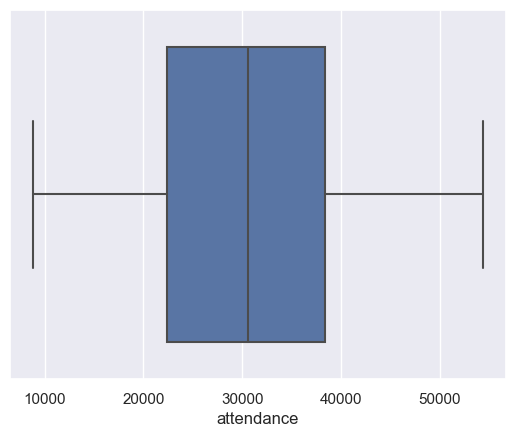

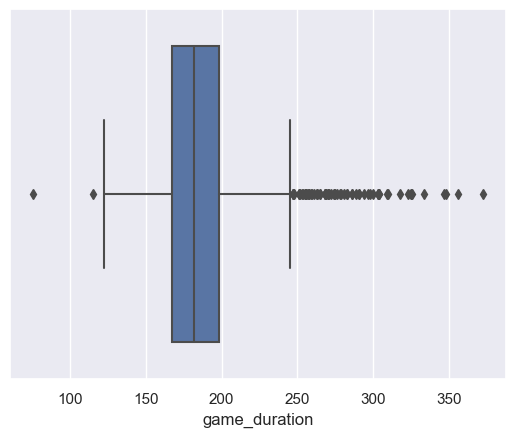

Distribution Analysis - Histogram


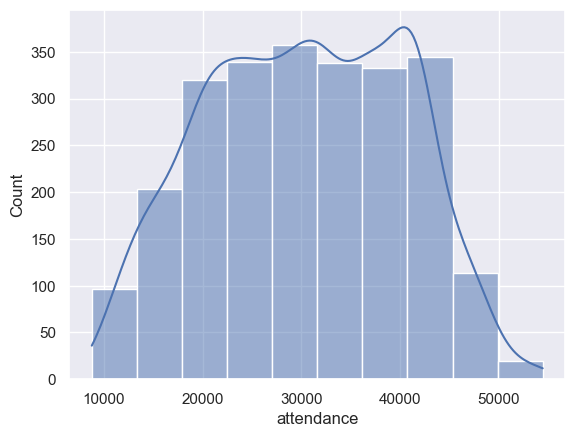

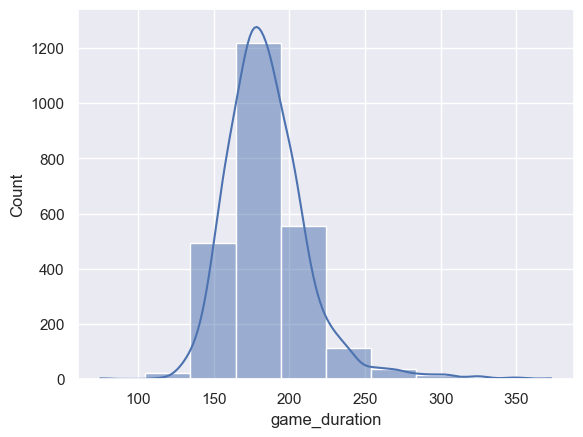

In [645]:
eda_num(baseballdata)

Bar Plot of game_type


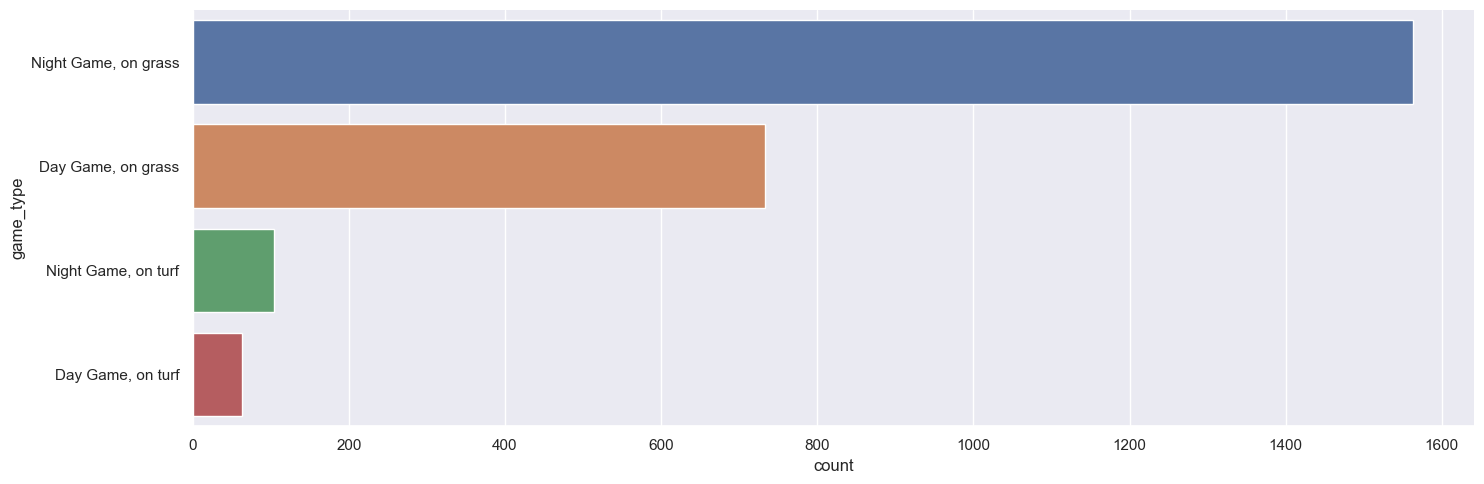

Summary of game_type


,count,relative_pct
"Night Game, on grass",1563,0.63
"Day Game, on grass",733,0.30
"Night Game, on turf",104,0.04
"Day Game, on turf",63,0.03


In [646]:
eda_cat(baseballdata, x = 'game_type')

Bar Plot of date


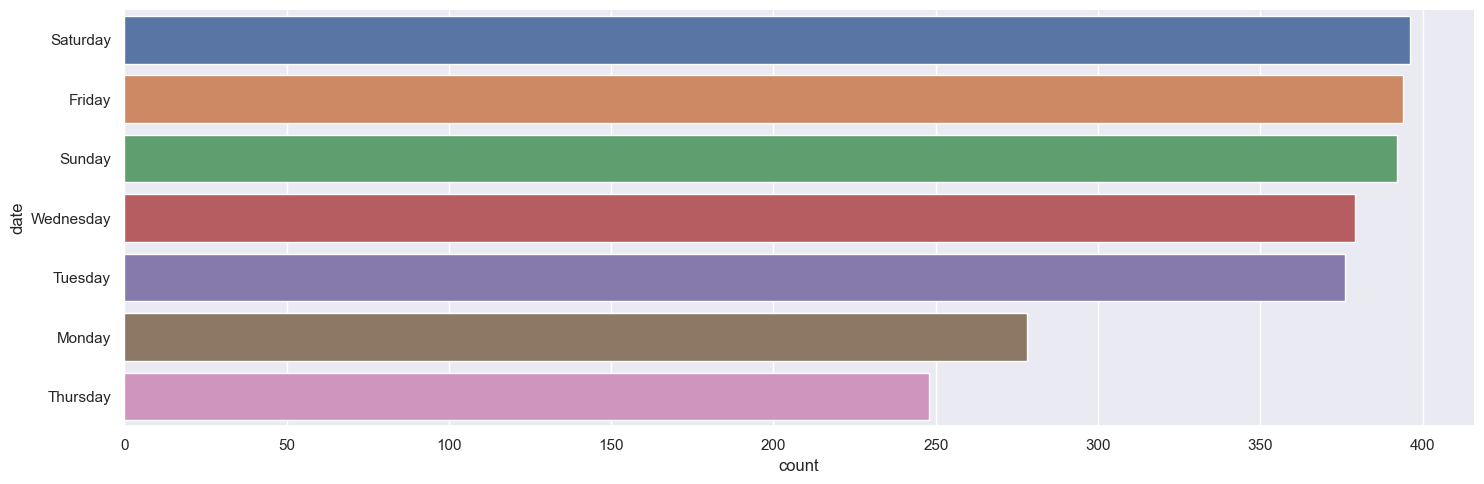

Summary of date


,count,relative_pct
Saturday,396,0.16
Friday,394,0.16
Sunday,392,0.16
Wednesday,379,0.15
Tuesday,376,0.15
Monday,278,0.11
Thursday,248,0.10


In [647]:
eda_cat(baseballdata, x='date')

Bar Plot of start_time


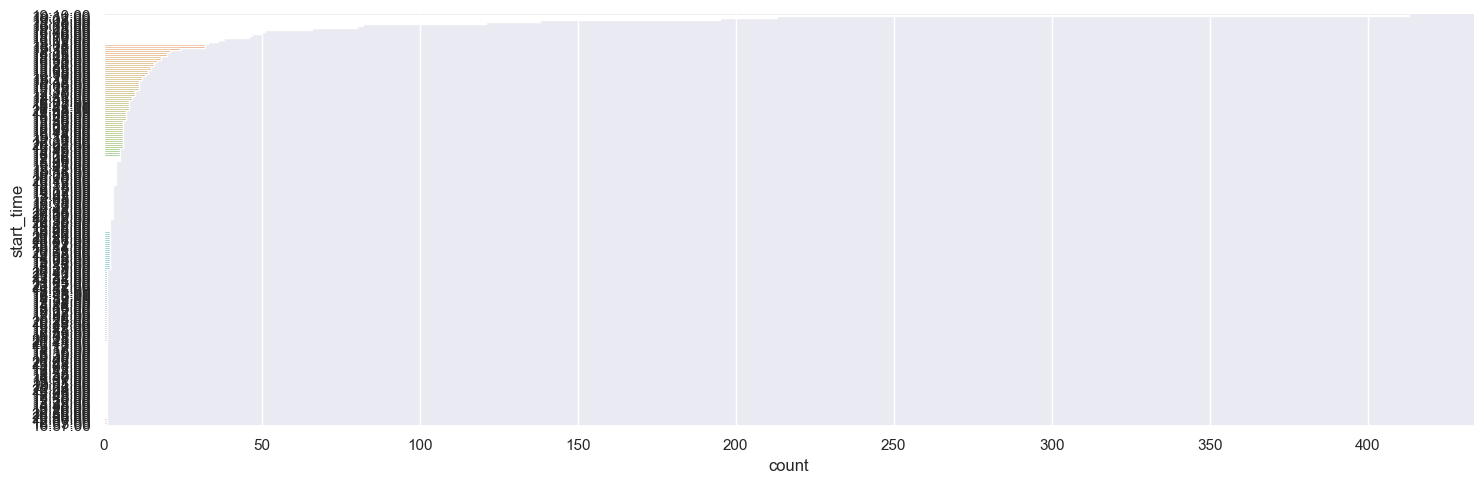

Summary of start_time


,count,relative_pct
19:10:00,413,0.17
19:11:00,213,0.09
19:07:00,195,0.08
19:08:00,138,0.06
13:10:00,121,0.05
...,...,...
20:30:00,1,0.00
13:50:00,1,0.00
12:07:00,1,0.00
16:33:00,1,0.00


In [649]:
eda_cat(baseballdata, x='start_time') #FIX ME

Bar Plot of venue


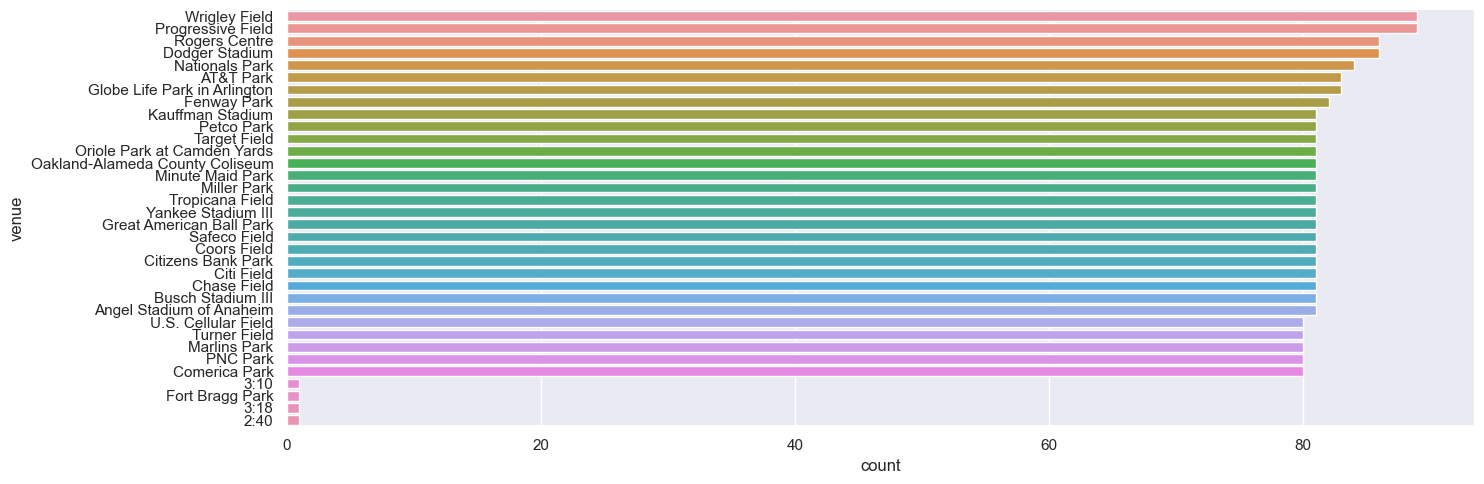

Summary of venue


,count,relative_pct
Wrigley Field,89,0.04
Progressive Field,89,0.04
Rogers Centre,86,0.03
Dodger Stadium,86,0.03
Nationals Park,84,0.03
AT&T Park,83,0.03
Globe Life Park in Arlington,83,0.03
Fenway Park,82,0.03
Kauffman Stadium,81,0.03
Petco Park,81,0.03


In [650]:
eda_cat(baseballdata, x='venue') #FIX ME